In [1]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [2]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [3]:
#Load the data and extract features for each sound file
def load_data(test_size=0.5):
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/*/*.wav"):
        file_name=os.path.basename(file)
        L=file_name.split('_')
        if L[2]=='angry.wav':
          e='angry'
        if L[2]=='disgust.wav':
          e='disgust'
        if L[2]=='fear.wav':
          e='fear'
        if L[2]=='happy.wav':
          e='happy'
        if L[2]=='neutral.wav':
          e='neutral'
        if L[2]=='ps.wav':
          e='pleasant surprised'
        if L[2]=='sad.wav':
          e='sad'
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
        x.append(feature)
        y.append(e)
    return train_test_split(np.array(x), y, test_size=test_size)

In [4]:
x_train,x_test,y_train,y_test=load_data(test_size=0.5)

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -2.7465820e-04 ...  1.8310547e-04
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  2.4414062e-04
  2.1362305e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ... -1.5869141e-03
 -1.1291504e-03 -1.0986328e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 9.1552734e-05 ... 3.0517578e-05 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ... -6.1035156e-05
 -9.1552734e-05 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00073242 -0.00317383 ...  0.00091553  0.00064087
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.0015564  -0.00219727 ...  0.00195312  0.00143433
  0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 6.1035156e-05 ... 1.2207031e-04 1.2207031e-04
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.      

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ...  5.4931641e-04
  5.7983398e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -4.5776367e-04 ...  0.0000000e+00
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  9.1552734e-05 ... -1.8310547e-04
 -1.5258789e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00012207 ...  0.00033569  0.00021362
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ...  2.7465820e-04
  1.5258789e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 6.1035156e-05 ... 9.1552734e-05 3.0517578e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -6.1035156e-05 ...  2.7465820e-04
  2.7465820e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00314331 -0.00616455 ... -0.00100708 -0.00094604
 -0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  1.5258789e-04
  1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 2.1362305e-04 3.0517578e-04
 2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  1.5258789e-04
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 1.8310547e-04 2.1362305e-04
 2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  1.5258789e-04
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00015259 -0.00012207 ... -0.00018311  0.00012207
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -2.4414062e-04 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  6.1035156e-05 ... -1.2207031e-04
 -1.5258789e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  6.1035156e-05 ... -7.6293945e-04
 -5.4931641e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.4414062e-04 -2.1362305e-04 ...  9.1552734e-05
  1.2207031e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.8310547e-04 ... -2.1362305e-04
 -2.7465820e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -9.1552734e-05
 -9.1552734e-05 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.00033569 0.00289917 ... 0.0005188  0.00033569 0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ... -1.8310547e-04
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ... -1.1291504e-03
 -1.1901855e-03 -6.7138672e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ... -3.9672852e-04
 -6.4086914e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  6.1035156e-05 ... -4.5776367e-04
 -2.4414062e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -9.1552734e-05 ... -9.1552734e-05
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  0.0000000e+00 ... -2.7465820e-04
 -3.6621094e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 6.1035156e-05 ... 9.7656250e-04 7.3242188e-04
 5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -1.2207031e-04 ...  2.4414062e-04
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ... -1.0681152e-03
 -1.4343262e-03 -1.7700195e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  1.8310547e-04  9.1552734e-05 ... -6.1035156e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 1.8310547e-04 9.1552734e-05 ... 3.0517578e-04 2.7465820e-04
 2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ...  6.1035156e-04
  4.8828125e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00015259 -0.00024414 ...  0.00054932  0.00021362
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  1.7395020e-03
  1.4648438e-03  8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  6.1035156e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  1.8310547e-04  2.7465820e-04 ... -2.1362305e-04
 -2.1362305e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -9.4604492e-04
 -5.7983398e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.8310547e-04 ... -1.8310547e-04
 -1.8310547e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.3569336e-04 -1.2207031e-04 ...  9.1552734e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.2207031e-04 ... -2.1362305e-04
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ... -2.7465820e-04
 -2.1362305e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ...  7.0190430e-04
  5.4931641e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05 -2.1362305e-04 ... -6.1035156e-05
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.1596680e-03 -1.1596680e-03 ... -1.5258789e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ... -1.8310547e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ... -2.1362305e-04
 -2.7465820e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ...  2.7465820e-04
  1.8310547e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -9.1552734e-05 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -3.3569336e-04
 -2.7465820e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -1.5258789e-04 ...  3.0517578e-05
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 2.1362305e-04 9.1552734e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 1.5258789e-04 1.5258789e-04 ... 1.2207031e-04 1.8310547e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00036621 -0.00048828 ...  0.00039673  0.00036621
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.8310547e-04 ...  3.6621094e-04
  4.5776367e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ... -5.7983398e-04
 -1.2207031e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00128174 -0.0022583  ...  0.00064087  0.00048828
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ... -5.7983398e-04
 -4.8828125e-04 -4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.5258789e-04 ... -4.5776367e-04
 -1.2207031e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00015259 -0.00015259 ... -0.00167847 -0.00128174
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ...  3.3569336e-04
  2.4414062e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 6.1035156e-05 ... 2.7465820e-04 1.5258789e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05 -1.2207031e-04 ... -3.9672852e-04
 -3.3569336e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -9.1552734e-05 ...  9.1552734e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ...  9.1552734e-05
  1.5258789e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ...  2.4414062e-04
  5.7983398e-04  5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.8310547e-04 ... -1.0986328e-03
 -4.2724609e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.8310547e-04 ...  2.1362305e-04
  0.0000000e+00 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ...  9.1552734e-05
  0.0000000e+00  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05 -3.0517578e-04 ...  5.4931641e-04
  5.7983398e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  1.2207031e-04 ... -1.2207031e-04
 -9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.5258789e-04 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 3.6621094e-04 3.3569336e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -6.1035156e-05 ...  2.4414062e-04
  1.8310547e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 3.6621094e-04 1.8310547e-04
 2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: Fu

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.7138672e-04  7.3242188e-04 ... -1.8310547e-04
  6.1035156e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ... -9.1552734e-05
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  3.9672852e-04
  5.4931641e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ...  4.8828125e-04
  3.6621094e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  6.1035156e-05 ... -1.8310547e-04
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  3.0517578e-05 ... -6.1035156e-05
 -1.5258789e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  5.1879883e-04
  6.1035156e-04  5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -5.7983398e-04
 -5.4931641e-04 -6.4086914e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -2.7465820e-04
  0.0000000e+00  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 0.0000000e+00 ... 3.3569336e-04 2.7465820e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ...  3.0517578e-05
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ... -6.7138672e-04
 -1.1596680e-03 -7.6293945e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  8.5449219e-04
  9.1552734e-04  4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  6.1035156e-05
  3.0517578e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 6.1035156e-05 ... 6.1035156e-05 1.5258789e-04
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 2.7465820e-04 5.7983398e-04
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00253296 -0.00262451 ...  0.00021362  0.00012207
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ...  3.0517578e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -1.2207031e-04
 -2.4414062e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  2.4414062e-04
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  3.0517578e-05 ... -1.5258789e-04
 -1.5258789e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.8310547e-04 ... -1.2207031e-04
 -1.2207031e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -2.7465820e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -3.3569336e-04
 -3.0517578e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -4.5776367e-04 -1.2207031e-04 ... -4.2724609e-04
 -7.9345703e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -2.1362305e-04
 -2.1362305e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ... -3.0517578e-05
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  3.0517578e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -1.8310547e-04
 -2.7465820e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ... -6.1035156e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  0.0000000e+00 ...  6.4086914e-04
  5.4931641e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -1.5258789e-04
 -1.2207031e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ... -5.4931641e-04
 -3.9672852e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
 -1.2207031e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00021362 ... -0.00027466 -0.00018311
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ... -1.8310547e-04
 -3.6621094e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00021362 ... -0.00033569 -0.00024414
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -9.1552734e-05 ... -2.1362305e-04
 -3.0517578e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -3.0517578e-05 ...  9.1552734e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00018311 -0.00030518 ...  0.00033569  0.00030518
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.         0.00012207 ... 0.00180054 0.00128174 0.00238037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ... -1.5258789e-04
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 1.2207031e-04 ... 2.1362305e-04 2.4414062e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.5258789e-04 ...  6.1035156e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 1.5258789e-04 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: Fu

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00012207 ... -0.00018311 -0.00015259
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  1.2207031e-04  6.1035156e-05 ... -2.1362305e-04
 -1.2207031e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  2.1362305e-04
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.1362305e-04 -6.1035156e-05 ...  2.1362305e-04
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.3569336e-04 3.6621094e-04 ... 1.8310547e-04 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ... -3.6621094e-04
 -2.7465820e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -2.1362305e-04
 -1.8310547e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00021362 -0.00012207 ... -0.00119019 -0.00112915
 -0.00106812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  1.2207031e-04 ... -1.5258789e-04
 -1.2207031e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ... -1.2207031e-04
 -9.1552734e-05 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -9.1552734e-05 ...  1.5258789e-04
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ...  2.1362305e-04
  1.5258789e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  1.5258789e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  0.0000000e+00 ... -9.1552734e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[1.8310547e-04 6.7138672e-04 3.3569336e-04 ... 7.6293945e-04 9.1552734e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -3.3569336e-04 -4.5776367e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00012207 -0.00024414 -0.00091553 ... -0.00039673  0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00030518 -0.00030518 -0.00149536 ...  0.00018311  0.00018311
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00030518  0.00021362 -0.00012207 ...  0.00042725  0.00085449
  0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00045776  0.00018311 -0.0005188  ...  0.00039673  0.00021362
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  3.051

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00033569 0.00094604 0.00082397 ... 0.00076294 0.00039673 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 5.7983398e-04  3.0517578e-05 -1.3732910e-03 ... -1.4038086e-03
 -1.1901855e-03 -2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.00088501 -0.00012207 ... -0.00039673 -0.00054932
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 5.7983398e-04  1.2817383e-03  4.5776367e-04 ... -2.4414062e-04
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00021362  0.00012207 -0.00030518 ...  0.00015259  0.00012207
  0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -3.9672852e-04 -6.1035156e-04 ...  1.5258789e-04
 -1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -3.0517578e-05 -1.5258789e-04 ... -5.4931641e-04
 -4.5776367e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.9672852e-04  3.0517578e-04 -5.4931641e-04 ...  9.1552734e-05
  6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207  0.00015259  0.00054932 ...  0.00048828  0.00030518
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04 -4.8828125e-04 -5.7983398e-04 ...  6.1035156e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.6621094e-04 -3.6621094e-04 -1.1901855e-03 ...  3.6621094e-04
  3.3569336e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5563965e-03  1.4038086e-03  9.1552734e-05 ... -6.1035156e-05
  3.0517578e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -1.2207031e-04 -6.4086914e-04 ... -5.7983398e-04
 -3.9672852e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05 -9.1552734e-05 ...  6.1035156e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -2.4414062e-04 -4.8828125e-04 ...  3.0517578e-05
  4.2724609e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-04 -1.8310547e-04 -6.1035156e-05 ... -2.1362305e-04
  3.0517578e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -1.2207031e-04 -1.2207031e-04 ...  1.8310547e-04
  3.0517578e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  1.2207031e-04 -3.0517578e-04 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 1.8310547e-04 5.1879883e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00012207  0.         -0.00021362 ... -0.00030518 -0.00030518
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 2.4414062e-04 3.6621094e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  0.0000000e+00 -3.9672852e-04 ... -1.5258789e-04
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -5.1879883e-04 -3.6621094e-04 ...  2.1362305e-04
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00018311  0.00036621  0.00030518 ... -0.00024414  0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: P

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  2.4414062e-04 -2.4414062e-04 ...  1.5258789e-04
  1.8310547e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  1.8310547e-04
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.3569336e-04 -3.0517578e-04 ... -6.1035156e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[6.1035156e-05 0.0000000e+00 6.1035156e-05 ... 3.3569336e-04 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[1.2207031e-04 2.4414062e-04 6.1035156e-05 ... 1.5258789e-04 2.1362305e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04  1.2207031e-04  1.8310547e-04 ... -2.1362305e-04
 -1.5258789e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: Fu

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  9.1552734e-05  6.1035156e-05 ...  2.1362305e-04
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  1.2207031e-04 ...  0.0000000e+00
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -3.0517578e-05 -3.0517578e-05 ...  8.8500977e-04
  7.3242188e-04  5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  9.1552734e-05 -3.0517578e-05 ...  3.9672852e-04
  3.0517578e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05  2.7465820e-04  2.1362305e-04 ...  6.1035156e-05
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05  9.1552734e-05 ...  1.2207031e-04
 -1.5258789e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00112915 -0.00253296 -0.00296021 ... -0.00045776  0.00018311
  0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[9.1552734e-05 2.1362305e-04 3.9672852e-04 ... 2.7465820e-04 2.1362305e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00024414  0.00045776  0.00030518 ... -0.00134277 -0.0005188
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-2.1362305

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[5.7983398e-04 4.8828125e-04 3.0517578e-04 ... 1.5258789e-04 1.8310547e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00045776  0.00039673 -0.00112915 ...  0.          0.00033569
  0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  3.0517578e-05  1.5258789e-04 ... -4.8828125e-04
 -1.2207031e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00012207 0.         0.00015259 ... 0.00033569 0.00021362 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.8828125e-04  6.1035156e-05 -7.6293945e-04 ... -2.4414062e-04
 -1.5258789e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.6621094e-04 -4.5776367e-04 -3.3264160e-03 ... -4.5776367e-04
 -4.8828125e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -9.1552734e-05 -3.0517578e-05 ... -2.1362305e-04
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00085449 -0.00048828 ...  0.0015564   0.00192261
  0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00045776 0.00015259 0.00012207 ... 0.0005188  0.00067139 0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0011901

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00030518 0.00042725 0.0007019  ... 0.00024414 0.00015259 0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -1.4038086e-03 -2.3193359e-03 ... -3.9672852e-04
  3.0517578e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  1.8310547e-04  9.1552734e-05 ... -3.0517578e-05
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  2.7465820e-04 -3.0517578e-05 ...  2.1362305e-04
  0.0000000e+00  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -9.4604492e-04 -1.5258789e-04 ...  8.8500977e-04
  5.1879883e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00027466 -0.00015259 -0.00064087 ...  0.00057983  0.00024414
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.5258789e-04 -1.2207031e-04 -1.2207031e-04 ... -3.0517578e-04
 -3.9672852e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -2.4414062e-04 -1.4953613e-03 ...  3.9672852e-04
  3.0517578e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00027466 -0.00094604 -0.00375366 ... -0.00048828 -0.00076294
 -0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -9.1552734e-05 -1.0681152e-03 ...  9.1552734e-04
  7.9345703e-04  5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.6621094e-04 3.6621094e-04 3.6621094e-04 ... 6.7138672e-04 3.3569336e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -2.9907227e-03 -8.5449219e-04 ... -1.2207031e-04
  2.7465820e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -2.0751953e-03 -2.4719238e-03 ... -6.1035156e-05
  0.0000000e+00  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 5.1879883e-04  1.1901855e-03  3.0517578e-05 ...  5.7983398e-04
  3.0517578e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -1.2207031e-04 -2.3803711e-03 ...  7.6293945e-04
  3.0517578e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5563965e-03  4.8828125e-04 -1.1596680e-03 ... -2.1362305e-04
 -2.1362305e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00091553 -0.00085449 ...  0.00057983  0.00079346
  0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -3.0212402e-03 -1.7089844e-03 ... -2.1362305e-03
 -1.6174316e-03  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 1.5258789e-04 ... 1.4648438e-03 9.4604492e-04
 4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.0007019   0.00177002 -0.00457764 ... -0.00137329 -0.00015259
  0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.3427734e-03  2.1057129e-03  4.5776367e-04 ...  5.7983398e-04
  6.1035156e-05  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.7465820e-04 -6.1035156e-05 ...  3.0517578e-04
  2.7465820e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00036621 -0.00024414 ... -0.00018311 -0.00024414
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.3569336e-04  7.0190430e-04  6.4086914e-04 ... -8.8500977e-04
 -3.6621094e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04 -1.8310547e-04 -2.1057129e-03 ... -4.8828125e-04
 -3.3569336e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00317383  0.00045776 -0.00134277 ...  0.00131226  0.0007019
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00039673 -0.00177002 -0.00167847 ... -0.00088501 -0.00015259
 -0.00064087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.4

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00015259 -0.00018311 -0.00036621 ...  0.00054932  0.00067139
  0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05 -3.0517578e-04 ...  5.1879883e-04
 -6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  9.1552734e-05 ...  3.0517578e-05
  3.0517578e-05  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207 -0.00030518 -0.00033569 ...  0.00042725  0.00030518
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -3.0517578e-04 -3.9672852e-04 ...  3.3569336e-04
  3.3569336e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  0.0000000e+00 ... -2.1362305e-04
 -1.8310547e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00012207 -0.00021362 -0.00024414 ...  0.0012207   0.00100708
  0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  2.1362305e-04  5.4931641e-04 ... -9.1552734e-05
  3.6621094e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00027466 -0.00036621 ... -0.00039673  0.00048828
  0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -9.1552734e-05 -2.7465820e-04 ...  4.8828125e-04
  5.1879883e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  5.7983398e-04 ...  1.5258789e-04
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05 -1.2207031e-04 -1.2207031e-04 ...  2.7465820e-04
  2.1362305e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -6.1035156e-05 -9.1552734e-04 ... -1.5258789e-04
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.3569336e-04 -1.8310547e-04 ...  1.5258789e-04
  3.0517578e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -1.8310547e-04  0.0000000e+00 ... -3.0517578e-05
  1.8310547e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00  3.0517578e-05 ... -1.5258789e-04
  4.5776367e-04  6.1035156e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00042725 -0.00030518 ...  0.00061035  0.00039673
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00039673  0.00054932 -0.00064087 ...  0.0007019   0.00067139
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04 -9.1552734e-05  3.0517578e-05 ...  6.7138672e-04
  4.8828125e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 8.8500977e-04  3.9672852e-04 -2.1362305e-04 ...  3.0517578e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.3569336e-04  1.8310547e-04  3.0517578e-05 ... -5.4931641e-04
 -5.4931641e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.0005188  -0.00048828 ...  0.00112915  0.00100708
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -3.6621094e-04 -2.4414062e-04 ...  9.1552734e-05
  3.0517578e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  9.1552734e-05 -1.2207031e-04 ...  7.3242188e-04
  1.5258789e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00024414 -0.00073242 -0.00024414 ... -0.00015259 -0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ... -9.1552734e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05 -9.1552734e-05 ... -5.7983398e-04
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 1.2207031e-04 ... 1.5258789e-04 3.0517578e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05 -7.3242188e-04 ...  1.2207031e-03
  3.9672852e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  2.7465820e-04  3.9672852e-04 ... -2.1362305e-04
 -3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04 -9.1552734e-05  6.1035156e-05 ... -1.7700195e-03
 -8.5449219e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  6.1035156e-05 ... -6.1035156e-05
 -1.5258789e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.8310547e-04 -9.1552734e-05  3.6621094e-04 ... -2.1362305e-04
  2.1362305e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-05 -9.1552734e-05 ... -5.4931641e-04
 -5.7983398e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  1.2207031e-04  0.0000000e+00 ... -3.0517578e-05
 -2.4414062e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00039673 0.00036621 0.00012207 ... 0.         0.00018311 0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.3569336e-04 -2.4414062e-04 -6.1035156e-05 ...  9.1552734e-05
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  6.4086914e-04  9.1552734e-04 ... -3.9672852e-04
 -5.1879883e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  8.5449219e-04 -3.3569336e-04 ...  3.6621094e-04
  1.5258789e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -2.7465820e-04 -9.1552734e-05 ...  8.2397461e-04
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  1.2207031e-04  3.0517578e-05 ... -3.0517578e-05
 -1.8310547e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00042725 -0.00045776 -0.00045776 ...  0.00021362  0.00021362
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  3.0517578e-05  1.8310547e-04 ... -1.5258789e-04
 -1.8310547e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  6.1035156e-05  3.3569336e-04 ... -5.7983398e-04
 -4.8828125e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00045776  0.00042725  0.00079346 ... -0.00012207  0.00012207
  0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-04  9.1552734e-05 -1.2207031e-04 ... -9.1552734e-04
 -8.2397461e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.9672852e-04 -3.9672852e-04 ...  4.8828125e-04
  4.8828125e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00024414 0.00054932 0.00057983 ... 0.00085449 0.00024414 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  0.0000000e+00  1.2207031e-04 ... -2.1362305e-04
 -4.8828125e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  4.2724609e-04 -6.1035156e-05 ... -1.5258789e-04
 -1.5258789e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04 -6.1035156e-05 -1.5258789e-04 ...  2.1362305e-04
  2.4414062e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -2.1362305e-04 ...  2.4414062e-04
  1.2207031e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.5258789e-04  9.1552734e-05  2.1362305e-04 ... -2.1362305e-04
 -9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00054932 0.00054932 0.         ... 0.00140381 0.0007019  0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  9.1552734e-05  5.4931641e-04 ...  3.0517578e-05
  2.1362305e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00024414 -0.00067139 -0.00119019 ...  0.00061035  0.00045776
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -9.1552734e-05  1.2207031e-04 ...  1.8310547e-04
 -3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04  2.7465820e-04  9.4604492e-04 ... -2.7465820e-04
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.00045776  0.00045776 ... -0.00024414 -0.00027466
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00024414 -0.00021362 ...  0.00039673  0.00030518
  0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-2.7465820e-04  3.0517578e-04  3.0517578e-05 ... -2.4414062e-04
 -3.0517578e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04  9.1552734e-05  2.1362305e-04 ... -4.5776367e-04
 -4.8828125e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207  0.00091553  0.00204468 ... -0.00036621  0.00079346
  0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[1.2207031e-04 4.2724609e-04 2.7465820e-04 ... 6.1035156e-05 0.0000000e+00
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[9.1552734e-05 3.3569336e-04 3.0517578e-04 ... 7.3242188e-04 4.5776367e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  0.0000000e+00  4.2724609e-04 ... -9.1552734e-05
 -9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: Fu

In [15]:
labels = [y_train,y_test]
from itertools import chain
labels = list(chain.from_iterable(labels))
labels

['neutral',
 'pleasant surprised',
 'fear',
 'pleasant surprised',
 'disgust',
 'disgust',
 'disgust',
 'happy',
 'disgust',
 'neutral',
 'fear',
 'neutral',
 'neutral',
 'disgust',
 'pleasant surprised',
 'angry',
 'angry',
 'angry',
 'angry',
 'sad',
 'angry',
 'sad',
 'happy',
 'neutral',
 'fear',
 'sad',
 'angry',
 'happy',
 'fear',
 'happy',
 'disgust',
 'angry',
 'neutral',
 'disgust',
 'fear',
 'pleasant surprised',
 'disgust',
 'fear',
 'happy',
 'angry',
 'pleasant surprised',
 'sad',
 'sad',
 'neutral',
 'happy',
 'fear',
 'sad',
 'happy',
 'pleasant surprised',
 'disgust',
 'fear',
 'neutral',
 'neutral',
 'disgust',
 'fear',
 'angry',
 'fear',
 'sad',
 'neutral',
 'neutral',
 'angry',
 'fear',
 'angry',
 'angry',
 'disgust',
 'sad',
 'angry',
 'pleasant surprised',
 'neutral',
 'fear',
 'disgust',
 'disgust',
 'sad',
 'pleasant surprised',
 'angry',
 'fear',
 'fear',
 'happy',
 'sad',
 'neutral',
 'pleasant surprised',
 'happy',
 'happy',
 'fear',
 'happy',
 'disgust',
 'fe

In [6]:
df = pd.DataFrame(labels, columns =['emo'])
df

,emo
0,neutral
1,pleasant surprised
2,fear
3,pleasant surprised
4,disgust
...,...
2795,neutral
2796,fear
2797,disgust
2798,fear


In [16]:

y = np.array(labels)
y = np.unique(y)
y.sort()
y = list(y)

[Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400')]

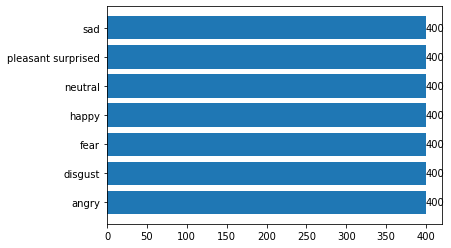

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

bars = plt.barh(y,df.groupby('emo').size())
plt.bar_label(bars)

In [18]:
df.groupby('emo').size()

emo
angry                 400
disgust               400
fear                  400
happy                 400
neutral               400
pleasant surprised    400
sad                   400
dtype: int64

In [22]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [23]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [24]:
# ONE HOT ENCODE THE TARGET
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [25]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]
x_train.shape

(1400, 182, 1)

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 173, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 164, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    

In [27]:
import tensorflow.keras as keras
model_history=model.fit(x_train, y_train,batch_size=128, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150
11/11 [==============================] - 5s 184ms/step - loss: 2.7592 - accuracy: 0.2286 - val_loss: 2.3374 - val_accuracy: 0.3571
Epoch 2/150
11/11 [==============================] - 1s 92ms/step - loss: 2.2227 - accuracy: 0.3907 - val_loss: 1.8800 - val_accuracy: 0.7050
Epoch 3/150
11/11 [==============================] - 1s 92ms/step - loss: 1.8285 - accuracy: 0.5314 - val_loss: 1.3826 - val_accuracy: 0.8529
Epoch 4/150
11/11 [==============================] - 1s 92ms/step - loss: 1.4236 - accuracy: 0.6786 - val_loss: 0.9713 - val_accuracy: 0.8750
Epoch 5/150
11/11 [==============================] - 1s 92ms/step - loss: 1.0887 - accuracy: 0.7929 - val_loss: 0.7011 - val_accuracy: 0.9729
Epoch 6/150
11/11 [==============================] - 1s 92ms/step - loss: 0.8622 - accuracy: 0.8557 - val_loss: 0.5428 - val_accuracy: 0.9771
Epoch 7/150
11/11 [==============================] - 1s 94ms/step - loss: 0.7035 - accuracy: 0.8929 - val_loss: 0.4648 - val_accuracy: 0.9771
Epoch

11/11 [==============================] - 1s 94ms/step - loss: 0.0689 - accuracy: 0.9957 - val_loss: 0.0596 - val_accuracy: 0.9957
Epoch 116/150
11/11 [==============================] - 1s 94ms/step - loss: 0.0636 - accuracy: 0.9964 - val_loss: 0.0505 - val_accuracy: 0.9986
Epoch 117/150
11/11 [==============================] - 1s 92ms/step - loss: 0.0702 - accuracy: 0.9971 - val_loss: 0.0532 - val_accuracy: 0.9964
Epoch 118/150
11/11 [==============================] - 1s 94ms/step - loss: 0.0546 - accuracy: 0.9971 - val_loss: 0.0665 - val_accuracy: 0.9929
Epoch 119/150
11/11 [==============================] - 1s 93ms/step - loss: 0.0638 - accuracy: 0.9943 - val_loss: 0.0594 - val_accuracy: 0.9936
Epoch 120/150
11/11 [==============================] - 1s 91ms/step - loss: 0.0598 - accuracy: 0.9943 - val_loss: 0.0542 - val_accuracy: 0.9957
Epoch 121/150
11/11 [==============================] - 1s 91ms/step - loss: 0.0530 - accuracy: 0.9971 - val_loss: 0.0546 - val_accuracy: 0.9950
Epoch 

In [28]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

44/44 [==============================] - 1s 19ms/step - loss: 0.0724 - accuracy: 0.9936
Loss of the model is -  0.07240704447031021
44/44 [==============================] - 1s 11ms/step - loss: 0.0724 - accuracy: 0.9936
Accuracy of the model is -  99.3571400642395 %


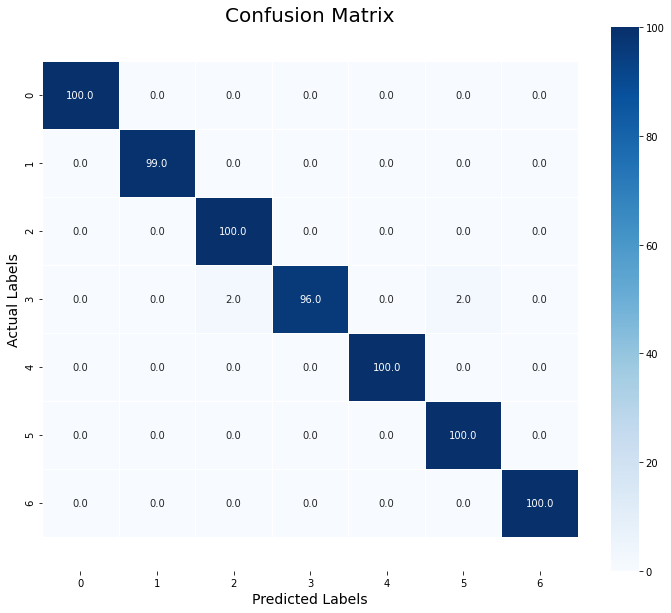

In [29]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
cm = confusion_matrix(actual, predictions,normalize='true')
plt.figure(figsize = (12, 10))
#conf_matrix= pd.DataFrame(cm,columns=None)
#conf_matrix.to_csv(r'E:\confusion_matrix.csv', index = False, header=False)
ax = sns.heatmap(np.round(cm*100), linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [30]:
print(classification_report(actual, predictions, target_names = ['angry','disgust','fear','happy','neutral','pleasant surprised','sad']))

                    precision    recall  f1-score   support

             angry       1.00      1.00      1.00       197
           disgust       1.00      0.99      1.00       207
              fear       0.98      1.00      0.99       202
             happy       1.00      0.96      0.98       191
           neutral       1.00      1.00      1.00       196
pleasant surprised       0.98      1.00      0.99       204
               sad       1.00      1.00      1.00       203

          accuracy                           0.99      1400
         macro avg       0.99      0.99      0.99      1400
      weighted avg       0.99      0.99      0.99      1400



In [31]:
from imblearn.metrics import specificity_score
s=specificity_score(actual,predictions,average='macro')
print(s)
from sklearn.metrics import roc_auc_score
y_score=model.predict(x_test)
auc=roc_auc_score(y_test, y_score, average='macro',multi_class='ovo')
print(auc)

0.9989257856899579
0.9999045265105749


In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
p=precision_score(actual,predictions,average='macro')
r=recall_score(actual,predictions,average='macro')
f=f1_score(actual,predictions,average='macro')
print(p,r,f)

0.9938084398993955 0.9933841356559316 0.9935097864717716


In [33]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(TPR)
print(FPR)

[1.         0.99033816 1.         0.96335079 1.         1.
 1.        ]
[0.         0.         0.00342295 0.         0.         0.00429555
 0.        ]


In [44]:
l=[]
for i in range(100):
  l.append(i+1)

In [45]:
from pandas import DataFrame
C = {'epoch no':l,
    'acc train':model_history.history['accuracy'],
    'acc val':model_history.history['val_accuracy'],
    'loss train':model_history.history['loss'],
    'loss val':model_history.history['val_loss']}
df = DataFrame(C, columns= ['epoch no','acc train','acc val','loss train','loss val'])
export_csv = df.to_csv (r'E:\result1.csv', index = None, header=True) 
print (df)

ValueError: All arrays must be of the same length

In [ ]:
from pandas import DataFrame
C = {
     'train acc':[str(model_history.history['accuracy'][99])],
     'test acc':[str(model_history.history['val_accuracy'][99])],
     'precision(macro)':[str(p)],
     'recall(macro)':[str(r)],
     'f1(macro)':[str(f)],
     'specificity(macro)':[str(s)],
     'AUC(macro)':[str(auc)],
     'train time per epoch':['4 sec'],
     'test time per epoch':['4 sec'],}
df = DataFrame(C, columns= ['train acc','test acc','precision(macro)','recall(macro)','f1(macro)','specificity(macro)','AUC(macro)','train time per epoch','test time per epoch'])
export_csv = df.to_csv (r'E:\result2.csv', index = None, header=True) 
print (df)

In [36]:
from pandas import DataFrame
C = {
     'TPR': TPR,
     'FPR': FPR}
df = DataFrame(C, columns= ['TPR','FPR'])
export_csv = df.to_csv (r'E:\result3.csv', index = None, header=True) 
print (df)

        TPR       FPR
0  1.000000  0.000000
1  0.990338  0.000000
2  1.000000  0.003423
3  0.963351  0.000000
4  1.000000  0.000000
5  1.000000  0.004296
6  1.000000  0.000000


In [41]:
target_names = ['angry','disgust','fear','happy','neutral','pleasant surprised','sad']

In [42]:
cf_matrix = confusion_matrix(actual, predictions)
print(cf_matrix)

[[197   0   0   0   0   0   0]
 [  0 205   1   0   0   1   0]
 [  0   0 202   0   0   0   0]
 [  0   0   3 184   0   4   0]
 [  0   0   0   0 196   0   0]
 [  0   0   0   0   0 204   0]
 [  0   0   0   0   0   0 203]]


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'angry'),
  Text(0, 1.5, 'disgust'),
  Text(0, 2.5, 'fear'),
  Text(0, 3.5, 'happy'),
  Text(0, 4.5, 'neutral'),
  Text(0, 5.5, 'pleasant surprised'),
  Text(0, 6.5, 'sad')])

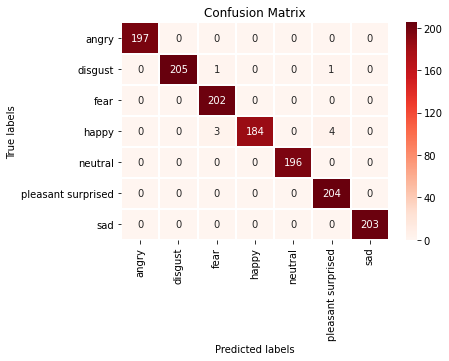

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);
plt.xticks(rotation=90)
plt.yticks(rotation=0)